In [1]:
import astropy
from astropy.convolution import convolve, Box1DKernel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
%matplotlib notebook

In [3]:
def TheScreamExtractor(File):
    Data = pd.read_csv(File, sep=" ", header=1)
    Data.columns = ['Frequency', 'Power']
    Frequency = Data.Frequency
    Power = Data.Power
    return Frequency, Power

In [4]:
File1 = 'kplr008006161_kasoc-ts_slc_v1.pow'
File2 = 'kplr008174981_kasoc-ts_slc_v1.pow'
File3 = 'kplr012009504_kasoc-ts_slc_v1.pow'

Frequency1, Power1 = TheScreamExtractor(File1)
Frequency2, Power2 = TheScreamExtractor(File2)
Frequency3, Power3 = TheScreamExtractor(File3)

In [5]:
Smooth1 = convolve(Power1, Box1DKernel(150/4))
Smooth2 = convolve(Power2, Box1DKernel(220/4))
Smooth3 = convolve(Power3, Box1DKernel(90/4))

Plotting the different data.

In [7]:
def Fitting(x, a, b, c):
    return a*np.exp(-b*x)+c

def Models(Frequency, Power):
    Parameters, Covarience = curve_fit(Fitting, Frequency, Power)
    FrequencyModel = np.linspace(50, 8000, 8001)
    PowerModel = Fitting(FrequencyModel, *Parameters)
    print(Parameters)
    return FrequencyModel, PowerModel

In [8]:
FrequencyModel1, PowerModel1 = Models(Frequency1, Smooth1)
FrequencyModel2, PowerModel2 = Models(Frequency2, Smooth2)
FrequencyModel3, PowerModel3 = Models(Frequency3, Smooth3)

C:\Users\georg\anaconda3\envs\Observatory Laboratory\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


[124.60033861   0.15912584   0.40890515]
[1.81306391e+01 4.72244563e-03 3.32183915e+00]
[5.61265843e+02 1.24562785e-01 1.24324799e+00]


In [13]:
def Plotting(Frequency, Power, Smoothed, ModelP, ModelF, Colour1, Colour2, Colour3):
    fig = plt.figure()
    plt.plot(Frequency, Power, color=Colour1, linewidth=0.2, label='Original')
    plt.plot(Frequency, Smoothed, color=Colour2, linewidth=0.2, label='Smoothed')
    plt.plot(ModelF, ModelP, color=Colour3, label='Model')
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(200, 8000)
    plt.ylabel('Power/ppm$^2\mu$Hz$^{-1}$')
    plt.xlabel(r'Frequency/$\mu$Hz')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


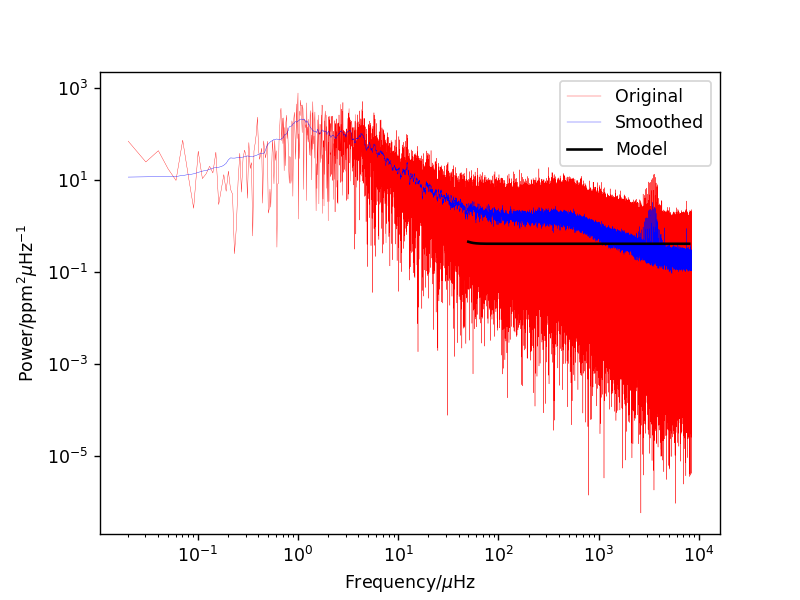

<IPython.core.display.Javascript object>


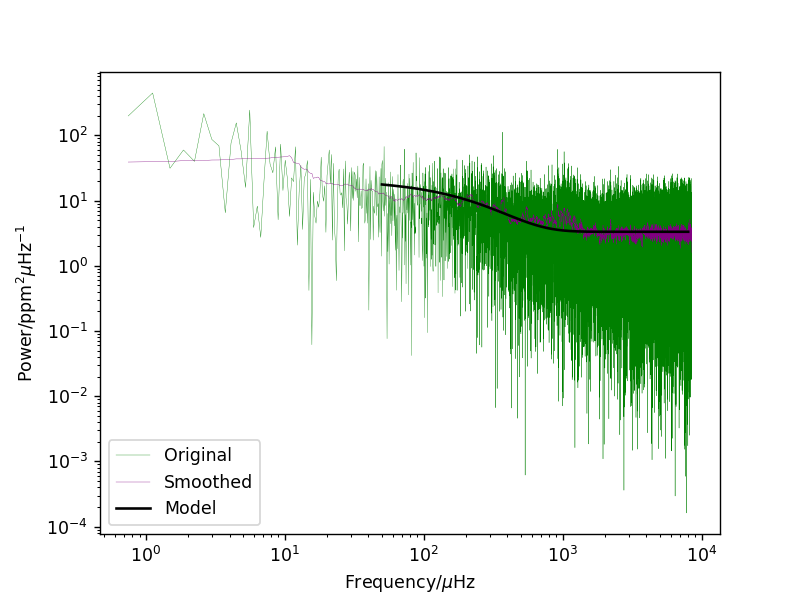

<IPython.core.display.Javascript object>


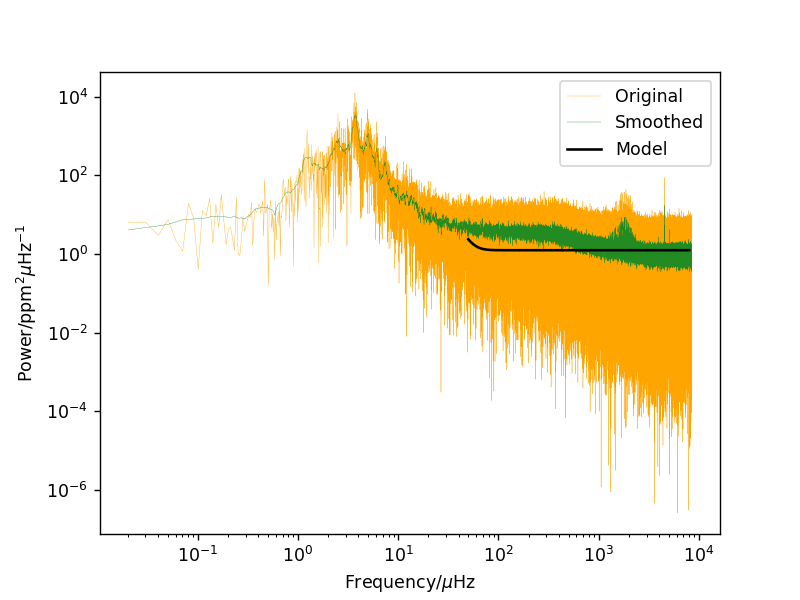

In [14]:
Plotting(Frequency1, Power1, Smooth1, PowerModel1, FrequencyModel1, 'red', 'blue', 'black')
Plotting(Frequency2, Power2, Smooth2, PowerModel2, FrequencyModel2, 'green', 'purple', 'black')
Plotting(Frequency3, Power3, Smooth3, PowerModel3, FrequencyModel3, 'orange', 'forestgreen', 'black')

## Binning

In [15]:
def Bins(Deltanu, Frequency, Power):
    n = 0
    NewPower = []
    NewFrequency = []
    while n < len(Frequency)-Deltanu:
        #Mean = np.mean(Power[n:n+Deltanu])
        Peak = np.max(Power[n:n+Deltanu])
        f = (Frequency[n]+Frequency[n+Deltanu])/2
        NewPower.append(Peak)
        NewFrequency.append(f)
        n += Deltanu
    return NewFrequency, NewPower

In [16]:
BinFrequency1, BinPower1 = Bins(1000, Frequency1, Power1)
BinFrequency2, BinPower2 = Bins(int(220/2), Frequency2, Power2)
BinFrequency3, BinPower3 = Bins(int(90/2), Frequency3, Power3)

In [17]:
ModelFrequency1, ModelPower1 = Models(BinFrequency1, BinPower1)
ModelFrequency2, ModelPower2 = Models(BinFrequency2, BinPower2)
ModelFrequency3, ModelPower3 = Models(BinFrequency3, BinPower3)

[2.09456792e+03 1.99160794e-01 3.22626430e+00]
[ 1.          1.         22.14185019]
[3.20934184e+03 1.27480182e-01 5.36327654e+00]


C:\Users\georg\AppData\Local\Temp\ipykernel_8008\3465997430.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)+c
C:\Users\georg\anaconda3\envs\Observatory Laboratory\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\georg\AppData\Local\Temp\ipykernel_8008\3465997430.py:2: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x)+c


In [18]:
def BinPlots(NewFrequency, NewPower, FrequencyModel, PowerModel):
    fig = plt.figure()
    plt.plot(NewFrequency, NewPower, label='Binned Data')
    plt.plot(FrequencyModel, PowerModel, label='Polynomial Model')
    plt.ylabel('Power/ppm$^2\mu$Hz$^{-1}$')
    plt.xlabel(r'Frequency/$\mu$Hz')
    plt.title('Bins Galore')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


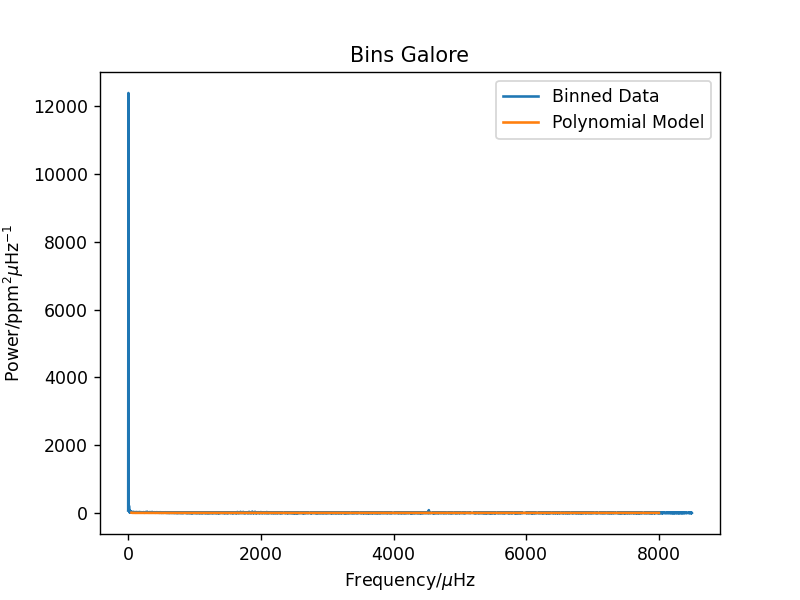

In [19]:
#BinPlots(BinFrequency1, BinPower1, ModelFrequency1, ModelPower1)
#BinPlots(BinFrequency2, BinPower2, ModelFrequency2, ModelPower2)
BinPlots(BinFrequency3, BinPower3, ModelFrequency3, ModelPower3)

## Bins

In [20]:
def Fitting2(x, m, c):
    return m*x + c

def Modelling(FrequencyB, PowerB, Start, End):
    Parameters, Covarience = curve_fit(Fitting2, FrequencyB, PowerB)
    FrequencyModel = np.linspace(Start, End, (End-Start+1))
    PowerModel = Fitting2(FrequencyModel, *Parameters)
    return FrequencyModel, PowerModel

In [22]:
#Frequency = ModelFrequency
#Power = ModelPower
FrequencyOld = []
PowerOld = []
for n in range(len(Frequency1)):
    if Frequency1[n] > 50:
        FrequencyOld.append(Frequency1[n])
        PowerOld.append(Power1[n])

In [42]:
def Bins(Deltanu, Frequency, Power):
    Range = int(Deltanu/4*len(Frequency)/np.ptp(Frequency))
    print(Range)
    n = 0
    NewPower = []
    NewFrequency = []
    while n < len(Frequency)-Range:
        Peak = np.mean(Power[n:n+Range])
        f = (Frequency[n]+Frequency[n+Range])/2
        NewPower.append(Peak)
        NewFrequency.append(f)
        n += Range
    return NewFrequency, NewPower

In [43]:
FrequencyBinned, PowerBinned = Bins(150, FrequencyOld, PowerOld)

3718


In [25]:
FrequencyModelTot, PowerModelTot = Models(FrequencyBinned, PowerBinned)

[1.         1.         0.41357704]


<IPython.core.display.Javascript object>


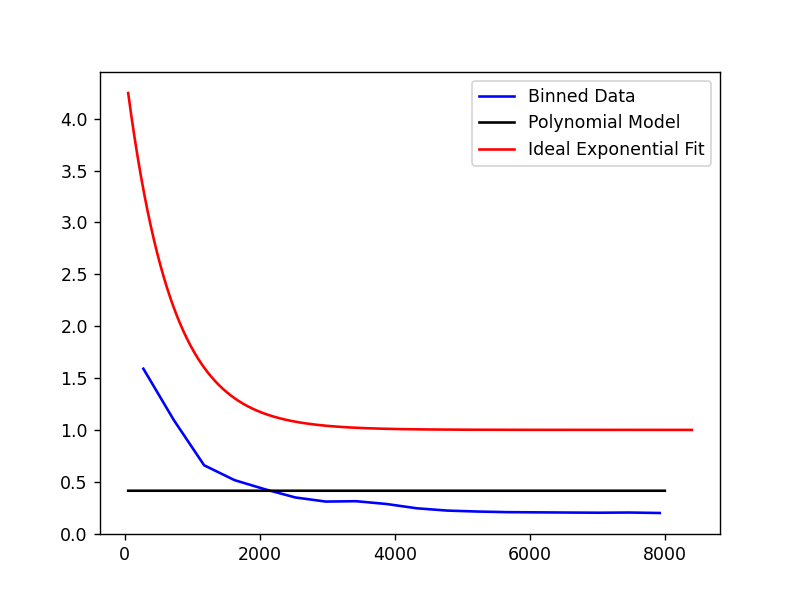

[]

In [26]:
plt.figure()
#plt.plot(FrequencyOld, PowerOld, 'r-', label='Original Data')
plt.plot(FrequencyBinned, PowerBinned, 'b-', label='Binned Data')
plt.plot(FrequencyModelTot, PowerModelTot, color='black', label='Polynomial Model')
m = 0
Jump = 5
while m < len(FrequencyBinned)-Jump:
    FrequencyModelled, PowerModelled = Modelling(FrequencyBinned[m:m+Jump], PowerBinned[m:m+Jump],
                                              int(FrequencyBinned[m]), int(FrequencyBinned[m+Jump]))
    #plt.plot(FrequencyModelled, PowerModelled, color='forestgreen')
    m += Jump
x = np.linspace(50, 8400, 8401)
y = 3.5*np.exp(-0.0015*x)+1
plt.plot(x, y, 'r-', label='Ideal Exponential Fit')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.plot()

### Comparing Means

In [27]:
PowerCopy = PowerBinned.copy()
FrequencyCopy = FrequencyBinned.copy()

Greater = []
Lesser = []
Previous = PowerCopy[0]
for n in range(len(PowerBinned)):
    print(n)
    if PowerBinned[n] > Previous:
        Greater.append(n)
        PowerCopy.remove(PowerBinned[n])
        FrequencyCopy.remove(FrequencyBinned[n])
    else:
        Lesser.append(n)
        Previous = PowerBinned[n]

print(len(Greater))
print(len(Lesser))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
2
16


In [28]:
FreMod, PowMod = Models(FrequencyCopy, PowerCopy)

[1.         1.         0.43301432]


<IPython.core.display.Javascript object>


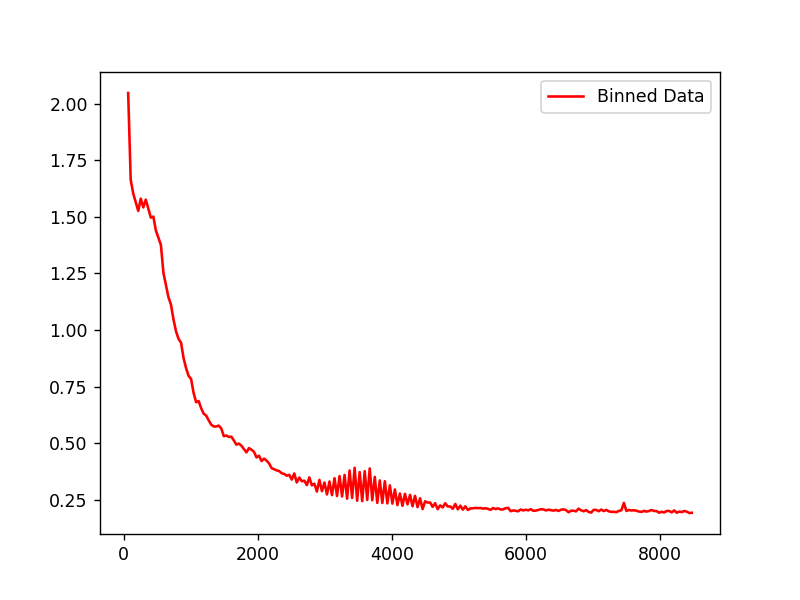

In [48]:
plt.figure()
plt.plot(FrequencyBinned, PowerBinned, 'r-', label='Binned Data')
#plt.plot(np.log(FrequencyCopy), np.log(PowerCopy), 'b-', label='Stupid Idea')
#plt.plot(FreMod, PowMod, color='black', label='Model')
plt.legend()
plt.show()

## Gradient

In [46]:
Gradient = []
for j in range(len(FrequencyBinned)-1):
    xdiff = FrequencyBinned[j+1] - FrequencyBinned[j]
    ydiff = PowerBinned[j+1] - PowerBinned[j]
    grad = ydiff/xdiff
    Gradient.append(grad)
Gradient.append(grad)
Gradient = np.array(Gradient)

<IPython.core.display.Javascript object>


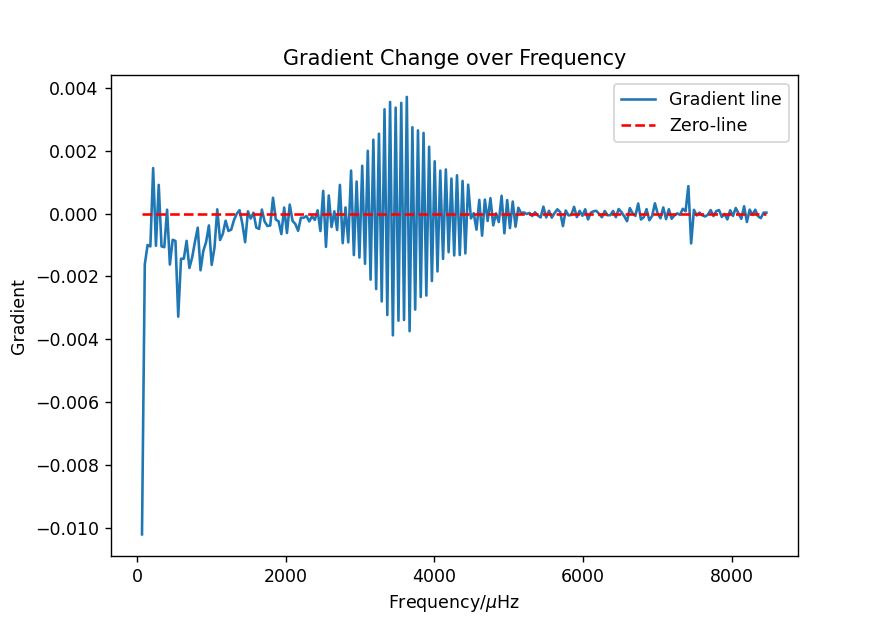

In [50]:
plt.figure()
plt.plot(FrequencyBinned, Gradient, label='Gradient line')
plt.plot([min(FrequencyBinned), max(FrequencyBinned)], [0, 0], 'r--', label='Zero-line')
plt.title('Gradient Change over Frequency')
plt.xlabel(r'Frequency/$\mu$Hz')
plt.ylabel('Gradient')
plt.legend()
plt.show()

In [ ]:
# The End....?
